In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import numpy as np
import tensorflow as tf
import gpflow
import matplotlib.pyplot as plt
import time

import asvgp.basis as basis
from asvgp.gpr import GPR_1d

In [2]:
# Load dataset
X = np.loadtxt('data/train_inputs').reshape(-1,1)
X_test = np.loadtxt('data/test_inputs').reshape(-1,1)
y = np.loadtxt('data/train_outputs').reshape(-1,1)
data = (X, y)

In [6]:
# Full GP
kernel = gpflow.kernels.Matern32()
gp = gpflow.models.GPR(data, kernel)

opt = gpflow.optimizers.Scipy()
opt.minimize(gp.training_loss, variables=gp.trainable_variables)

print('GP: ELBO = ',gp.maximum_log_likelihood_objective().numpy())

GP: ELBO =  -60.573988814770104


In [7]:
# ASVGP
a = -3.5                                    # Left edge of domain
b = 10.5                                    # Right edge of domain
m = 100                                     # Number of inducing variable
kernel = gpflow.kernels.Matern32()          # Matern kernel
splines = basis.B3Spline(a, b, m)           # B-Spline basis
asvgp = GPR_1d(data, kernel, splines)

opt = gpflow.optimizers.Scipy()
opt.minimize(asvgp.training_loss, variables=asvgp.trainable_variables)

print('ASVGP: ELBO = ',asvgp.maximum_log_likelihood_objective().numpy())

ASVGP: ELBO =  -60.8356263428725


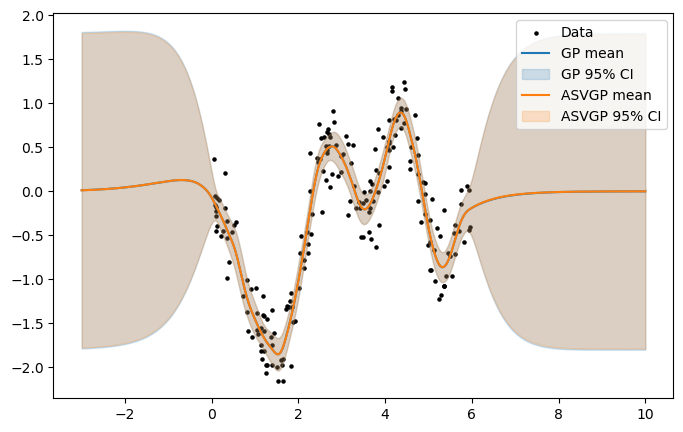

In [8]:
# Plot
fig = plt.figure(figsize=(8, 5))

# Data
plt.scatter(X, y, color="black", s=5, label="Data")

# GP
mean, var = gp.predict_f(X_test)
mean = mean.numpy()
var = var.numpy()
var.reshape(-1)
plt.plot(X_test, mean, color="C0", label="GP mean")
plt.fill_between(X_test.reshape(-1), mean.reshape(-1) - 2*np.sqrt(var.reshape(-1)), mean.reshape(-1) + 2*np.sqrt(var.reshape(-1)), color="C0", alpha=0.2, label="GP 95% CI")

# ASVGP
mean, var = asvgp.predict_f(X_test)
plt.plot(X_test, mean, color="C1", label="ASVGP mean")
plt.fill_between(X_test.reshape(-1), mean.reshape(-1) - 2*np.sqrt(var.reshape(-1)), mean.reshape(-1) + 2*np.sqrt(var.reshape(-1)), color="C1", alpha=0.2, label="ASVGP 95% CI")
plt.legend()
plt.show()